In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import constrainedzoom as cz
import constrainedzoom.plots as cp
import functools
import numpy as np
import matplotlib.pyplot as p
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

Here's how to test the behaviour of the unconstrained covariance in the case of the main genetIC algorithm (aka here 'Fast Filter' approach)

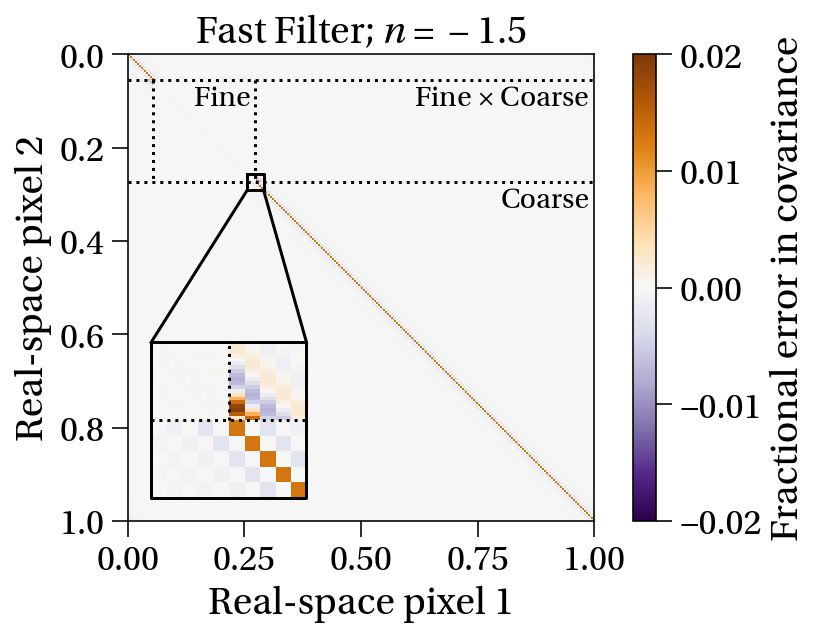

In [2]:
cp.cov_zoom_demo(method=cz.methods.filtered.FilteredZoomConstrained,
                 errors=True,plaw=-1.5,vmin=-0.02,vmax=0.02)

Switch to the traditional zoom method, as implemented by MUSIC (Hahn & Abel):

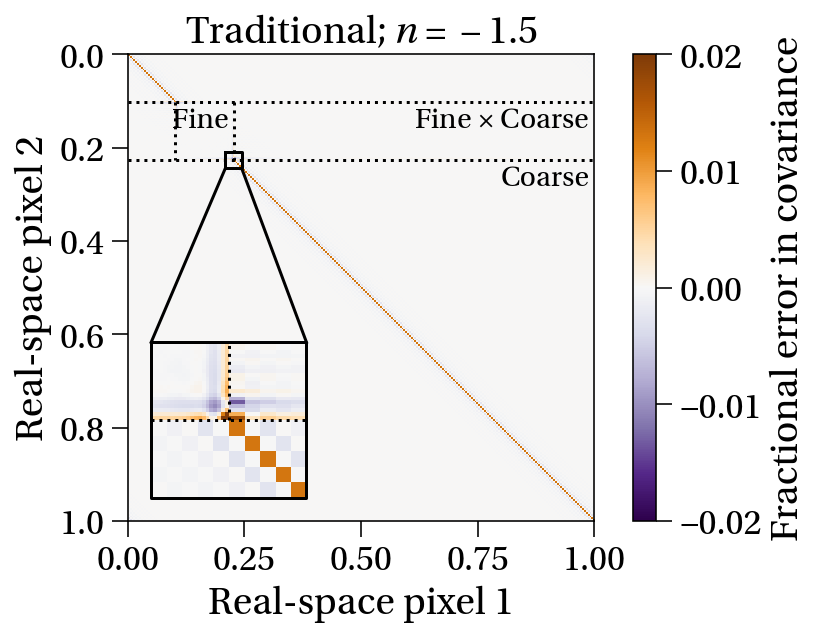

In [3]:
cp.cov_zoom_demo(method=cz.methods.traditional.TraditionalZoomConstrained,
                 errors=True,with_constraint=False,
                 plaw=-1.5,vmin=-0.02,vmax=0.02)

As noted by Hahn & Abel, using the traditional algorithm but performing convolutions with the Fourier-space power spectrum (rather than evaluating it in real space) causes serious errors, as we see here:

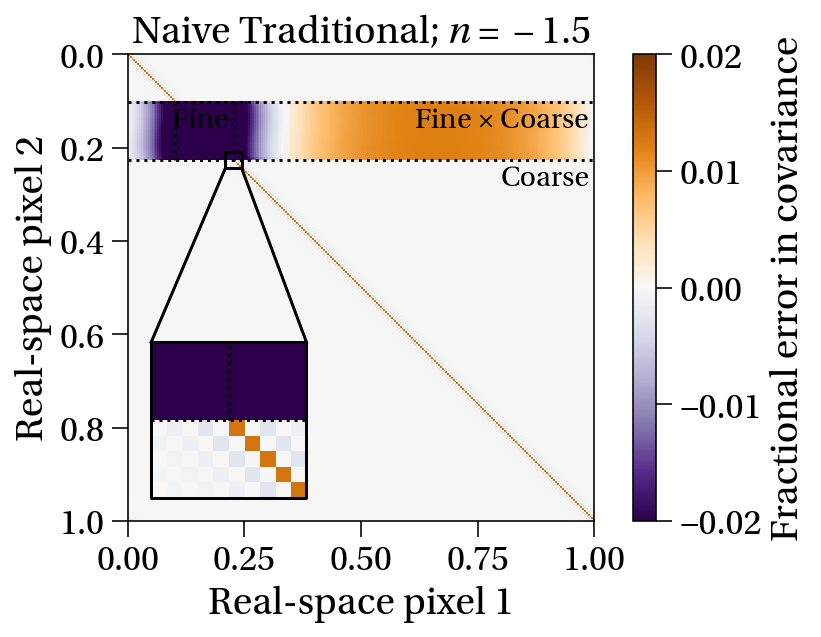

In [4]:
cp.cov_zoom_demo(method=cz.methods.traditional.BertschingerZoomConstrained,
                 errors=True,with_constraint=False,
                 plaw=-1.5,vmin=-0.02,vmax=0.02)

Switch to an exact maximum likelihood zoom algorithm (which is computationally unfeasible for 3D grids, but gives a sense of the best possible performance):

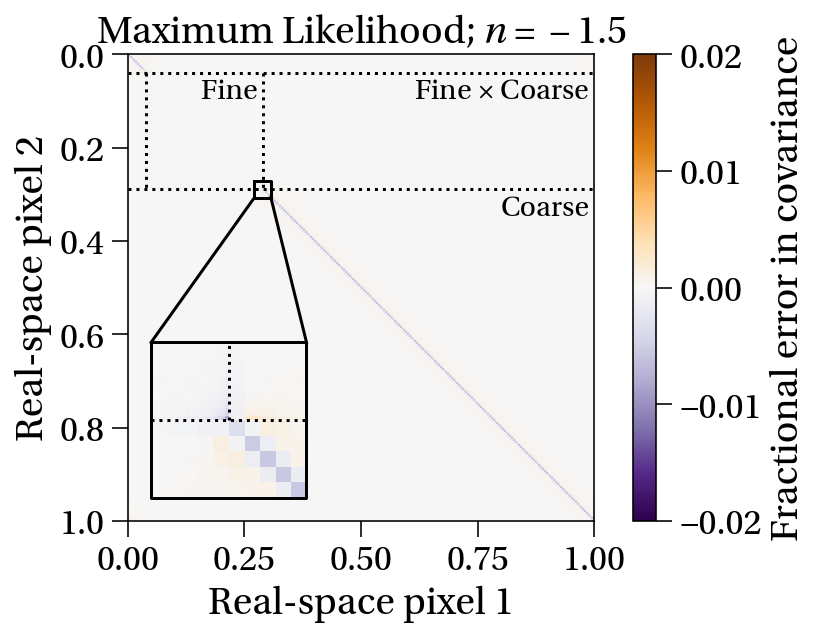

In [5]:
cp.cov_zoom_demo(method=cz.methods.ml.MLZoomConstrained,
                 errors=True,with_constraint=False,
                 plaw=-1.5,vmin=-0.02,vmax=0.02)

Next we can see a comparison of how constraints operate. Note that here we have actually implemented multi-level constraints even for the 'traditional' (MUSIC-like) algorithm. Such an approach is not actually implemented in MUSIC, but it shows how it would perform if implemented. It's seemingly OK for constraining density, if it were to be implemented:

Traditional constraint value 1.00 (target 1.00)
Fast Filter constraint value 1.00 (target 1.00)
Idealized constraint value 1.00 (target 1.00)
Traditional constraint value -0.00 (target 1.00)
Fast Filter constraint value 0.00 (target 1.00)


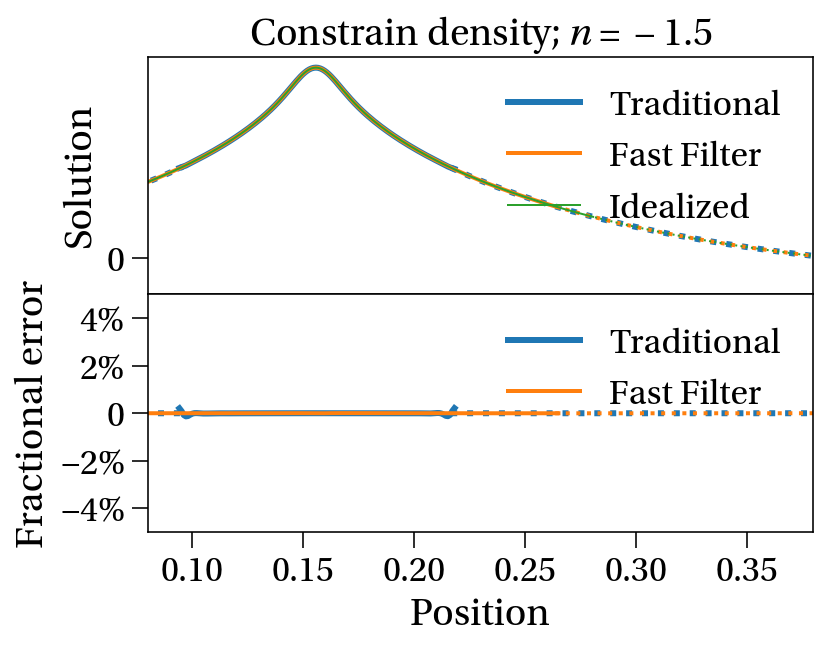

In [6]:
cp.compare_constraints_with_errors(plaw=-1.5, velocity=False, covector_width=50)

But when it comes to velocity constraints, the traditional approaches struggle (assuming they ever get implemented). The Fast Filter (i.e. genetIC implementation) still seems fine

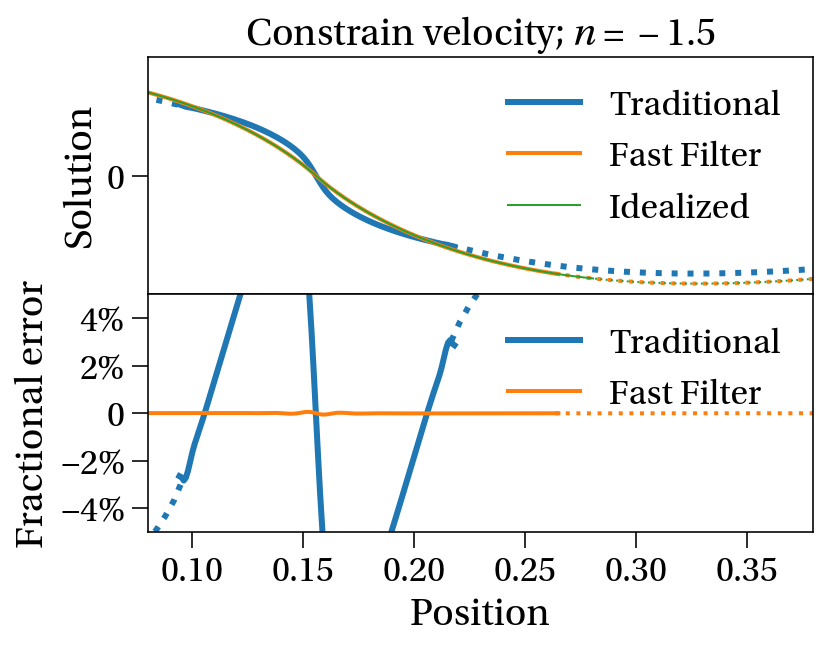

In [7]:
cp.compare_constraints_with_errors(plaw=-1.5, velocity=True, covector_width=10)